In [1]:
import sys
import os 
sys.path.append('..')
sys.path.append('../..')
sys.path.append('../../..')

from dcc import Parameters, AAV, OAV


import numpy as np
import pickle
import copy
from itertools import product

from IPython.display import HTML, clear_output

import matplotlib.pyplot as plt

import policy_pricer_python
from policy_pricer.cython_pricer import cython_pricer_naive
from policy_pricer import pricer_naive
from policy_pricer.cython_pricer import cython_pricer_optimized

from scipy.stats import ks_2samp

In [2]:
params = Parameters()
aav = AAV(params)
sample_acc = np.array([5., 200])
aav.u(sample_acc[0], sample_acc[1])

[INFO] [2021-04-18 18:33:57,552] [AAV] - Instantiated @ AAV


-193.46379389522158

In [3]:
c_params = cython_pricer_optimized.convert_params_obj(params)
c_params

array([ 0.1 ,  0.7 ,  0.02,  0.5 ,  1.  , 10.  ,  0.06])

testing t_equation, and next_arrival functions

In [4]:
t_to_sustain = 100.
l = 4.
repeats = 5000
res_cython = np.zeros((repeats, 2))
res_python = np.zeros((repeats, 2))

for i in range(repeats):
    res_cython[i, :] = cython_pricer_naive.next_arrival(t_to_sustain, l , c_params)
    res_python[i, :] = policy_pricer_python.next_arrival(t_to_sustain, l , params)

<AxesSubplot:ylabel='Count'>

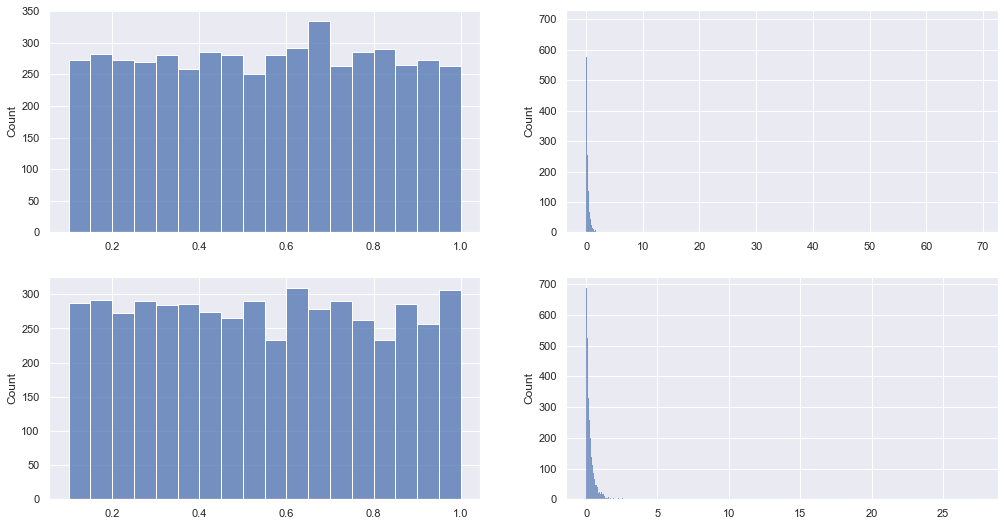

In [5]:
import seaborn as sns, numpy as np
sns.set_theme(); np.random.seed(0)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(17, 9))

sns.histplot(res_cython[:, 0], ax=ax[0, 0])
sns.histplot(res_cython[:, 1], ax=ax[0, 1])
sns.histplot(res_python[:, 0], ax=ax[1, 0])
sns.histplot(res_python[:, 1], ax=ax[1, 1])

In [6]:
ks_2samp(res_cython[:, 0], res_python[:, 0])

KstestResult(statistic=0.0178, pvalue=0.40671816589876386)

In [7]:
ks_2samp(res_cython[:, 1], res_python[:, 1])

KstestResult(statistic=0.0132, pvalue=0.7764175867140878)

In [8]:
a = res_cython[:, 0]
b = res_cython[:, 1]
a_py = res_python[:, 1]

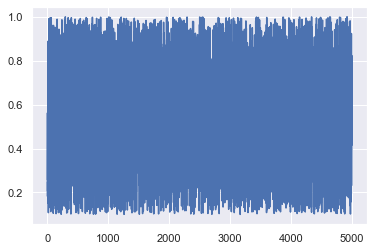

In [9]:
plt.plot(a)

Testing single collections

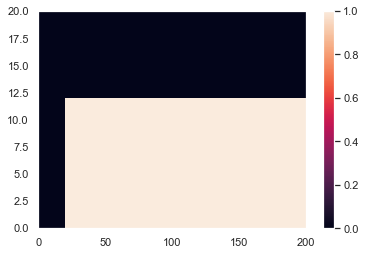

In [10]:
l = np.linspace(0, 20, 500)
w = np.linspace(0, 200, 500)
ww, ll = np.meshgrid(w, l)

autonomous_p = np.zeros_like(ww,dtype='int64')
degenerate_p = autonomous_p.copy()
# degenerate_p[:, 300:] = 1
degenerate_p[:300, 50:] = 1
plt.pcolormesh(ww, ll, degenerate_p, shading='auto')
plt.colorbar()
plt.show()

In [11]:
print('AAV testing')
print(f"Autonomous: {-aav.u(sample_acc[0], sample_acc[1])}")
print(f"Python: {np.mean(policy_pricer_python.value_account(sample_acc, ww, ll, autonomous_p, params, np.array([0, 1.]), n_iterations=10000))}")
print(f"Cython naive: {np.mean(cython_pricer_naive.value_account(sample_acc, ww, ll, autonomous_p, c_params, np.array([0, 1.]), n_iterations=10000))}")
print(f"Cython optimized: {np.mean(cython_pricer_optimized.value_account(sample_acc, ww, ll, autonomous_p, c_params, np.array([0, 1.]), n_iterations=10000))}")

AAV testing
Autonomous: 193.46379389522158
Python: 193.1155242919922
Cython naive: 193.21632385253906
Cython optimized: 193.20191624802752


In [12]:
print('Single Collection')
print(f"Python: {np.mean([policy_pricer_python.single_collection(sample_acc, ww, ll, degenerate_p, params, np.array([0, 1.])) for _ in range(5000)])}")
print(f"Cython naive: {np.mean([cython_pricer_naive.single_collection(sample_acc, ww, ll, degenerate_p, c_params, np.array([0, 1.])) for _ in range(5000)])}")
print(f"Cython optimized: {np.mean([cython_pricer_optimized.single_collection(sample_acc, ww, ll, degenerate_p, c_params, np.array([0, 1.])) for _ in range(5000)])}")

Single Collection
Python: 106.8671019773331
Cython naive: 106.92828329891458
Cython optimized: 106.70930404414906


In [13]:
print(f"Python: {np.mean(policy_pricer_python.value_account(sample_acc, ww, ll, degenerate_p, params, np.array([0, 1.]), n_iterations=10000))}")
print(f"Cython naive: {np.mean(cython_pricer_naive.value_account(sample_acc, ww, ll, degenerate_p, c_params, np.array([0, 1.]), n_iterations=10000))}")
print(f"Cython optimized: {np.mean(cython_pricer_optimized.value_account(sample_acc, ww, ll, degenerate_p, c_params, np.array([0, 1.]), n_iterations=10000))}")

Python: 106.9103775024414
Cython naive: 106.5112533569336
Cython optimized: 106.83939781458125
